In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [2]:
data = pd.read_csv("3w.csv")

Features and Target variables

In [3]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2']].values

# FOR LCV
# features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_4W','%_of_4W*2','2W','3W']].values
target = data['SD'].values

Normalize data

In [4]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [6]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [7]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)



Epoch 1/800

16/16 [==============================] - 1s 19ms/step - loss: 272.5937 - val_loss: 293.4852
Epoch 2/800
16/16 [==============================] - 0s 4ms/step - loss: 261.1125 - val_loss: 266.4948
Epoch 3/800
16/16 [==============================] - 0s 5ms/step - loss: 159.9011 - val_loss: 43.7257
Epoch 4/800
16/16 [==============================] - 0s 4ms/step - loss: 51.2664 - val_loss: 77.7960
Epoch 5/800
16/16 [==============================] - 0s 4ms/step - loss: 40.6678 - val_loss: 43.1171
Epoch 6/800
16/16 [==============================] - 0s 4ms/step - loss: 33.8166 - val_loss: 46.3384
Epoch 7/800
16/16 [==============================] - 0s 4ms/step - loss: 34.4328 - val_loss: 45.2052
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 35.6923 - val_loss: 41.8187
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 33.7357 - val_loss: 47.5461
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 34.6841 

Visualize LSTM results

0.5917093856527083


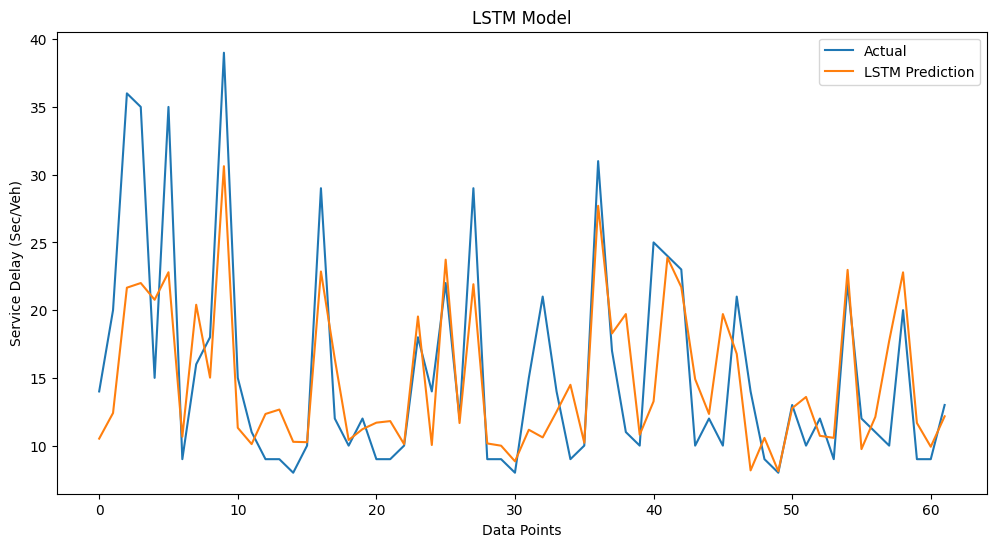

In [8]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [9]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
16/16 [==============================] - 3s 25ms/step - loss: 270.6465 - val_loss: 286.3903
Epoch 2/800
16/16 [==============================] - 0s 6ms/step - loss: 229.6837 - val_loss: 145.1208
Epoch 3/800
16/16 [==============================] - 0s 5ms/step - loss: 50.3539 - val_loss: 62.4857
Epoch 4/800
16/16 [==============================] - 0s 5ms/step - loss: 34.0648 - val_loss: 31.4748
Epoch 5/800
16/16 [==============================] - 0s 6ms/step - loss: 29.5852 - val_loss: 27.0980
Epoch 6/800
16/16 [==============================] - 0s 6ms/step - loss: 28.8189 - val_loss: 28.1986
Epoch 7/800
16/16 [==============================] - 0s 5ms/step - loss: 27.0243 - val_loss: 26.7411
Epoch 8/800
16/16 [==============================] - 0s 6ms/step - loss: 25.4225 - val_loss: 27.8363
Epoch 9/800
16/16 [==============================] - 0s 4ms/step - loss: 26.3045 - val_loss: 26.9585
Epoch 10/800
16/16 [==============================] - 0s 4ms/step - loss: 25.7485 - va

Visualize BiLSTM results

0.5318984520828265


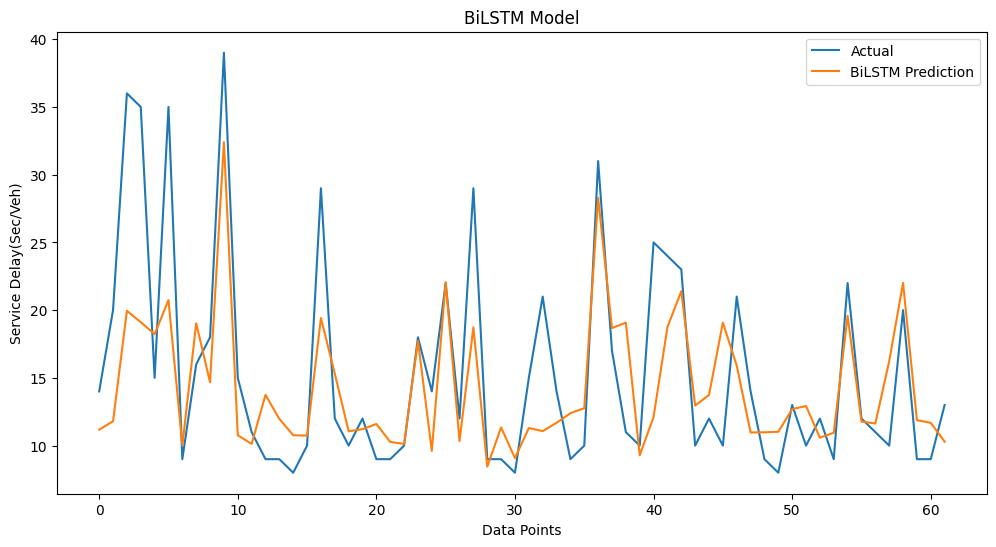

In [10]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [11]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/800
16/16 [==============================] - 1s 15ms/step - loss: 271.6344 - val_loss: 290.6349
Epoch 2/800
16/16 [==============================] - 0s 3ms/step - loss: 253.0823 - val_loss: 247.6917
Epoch 3/800
16/16 [==============================] - 0s 4ms/step - loss: 139.0106 - val_loss: 50.5511
Epoch 4/800
16/16 [==============================] - 0s 4ms/step - loss: 42.4305 - val_loss: 47.4980
Epoch 5/800
16/16 [==============================] - 0s 4ms/step - loss: 33.5296 - val_loss: 41.8672
Epoch 6/800
16/16 [==============================] - 0s 4ms/step - loss: 33.0409 - val_loss: 41.6223
Epoch 7/800
16/16 [==============================] - 0s 4ms/step - loss: 34.4139 - val_loss: 40.9779
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 33.4450 - val_loss: 40.7277
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 36.6020 - val_loss: 43.3943
Epoch 10/800
16/16 [==============================] - 0s 4ms/step - loss: 31.8445 - v

Visualize GRU results

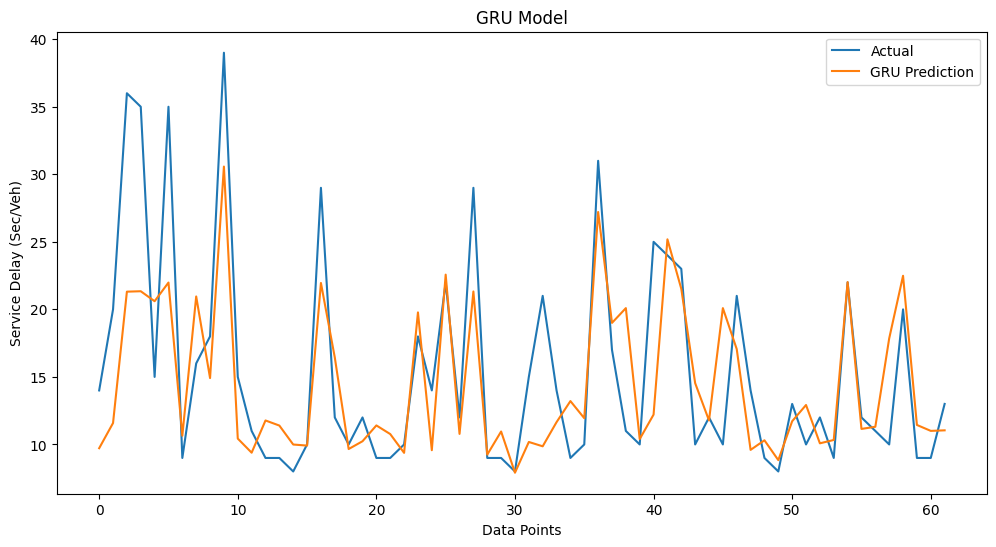

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [13]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/800
16/16 [==============================] - 3s 26ms/step - loss: 263.7796 - val_loss: 269.2668
Epoch 2/800
16/16 [==============================] - 0s 4ms/step - loss: 194.7830 - val_loss: 79.6122
Epoch 3/800
16/16 [==============================] - 0s 4ms/step - loss: 44.8226 - val_loss: 49.0081
Epoch 4/800
16/16 [==============================] - 0s 5ms/step - loss: 31.7763 - val_loss: 31.0147
Epoch 5/800
16/16 [==============================] - 0s 6ms/step - loss: 29.0205 - val_loss: 30.3274
Epoch 6/800
16/16 [==============================] - 0s 5ms/step - loss: 27.2687 - val_loss: 28.7874
Epoch 7/800
16/16 [==============================] - 0s 4ms/step - loss: 26.7637 - val_loss: 30.0141
Epoch 8/800
16/16 [==============================] - 0s 5ms/step - loss: 26.8224 - val_loss: 27.0750
Epoch 9/800
16/16 [==============================] - 0s 6ms/step - loss: 26.5779 - val_loss: 26.7971
Epoch 10/800
16/16 [==============================] - 0s 5ms/step - loss: 25.6359 - val

Visualize BiGRU results

0.5045382659778227


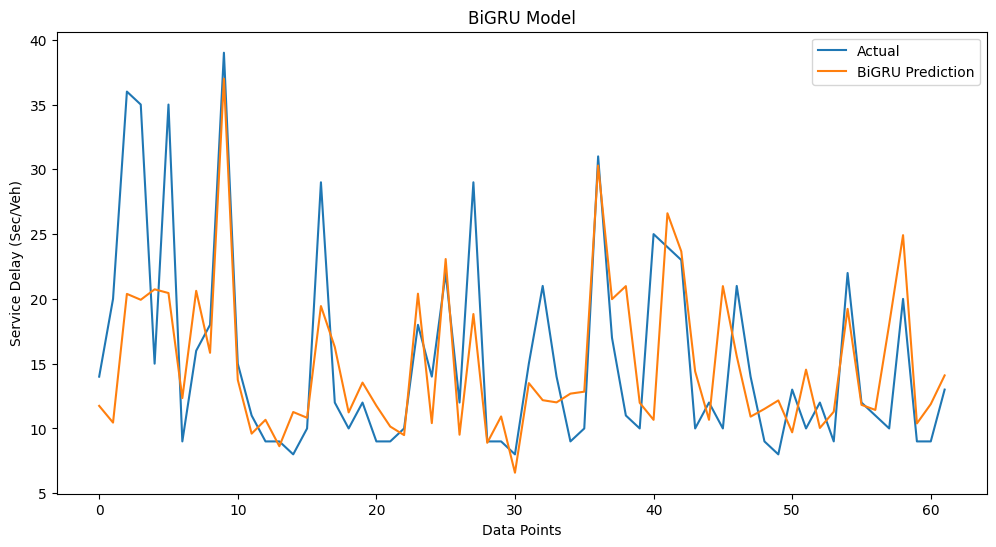

In [14]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [15]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)


Epoch 1/800
16/16 [==============================] - 0s 7ms/step - loss: 267.7436 - val_loss: 280.2621
Epoch 2/800
16/16 [==============================] - 0s 2ms/step - loss: 240.6482 - val_loss: 237.6274
Epoch 3/800
16/16 [==============================] - 0s 3ms/step - loss: 182.9034 - val_loss: 154.4961
Epoch 4/800
16/16 [==============================] - 0s 2ms/step - loss: 93.3735 - val_loss: 61.8138
Epoch 5/800
16/16 [==============================] - 0s 2ms/step - loss: 34.4140 - val_loss: 34.0980
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 32.1744 - val_loss: 33.7228
Epoch 7/800
16/16 [==============================] - 0s 2ms/step - loss: 29.9389 - val_loss: 35.6883
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 30.0420 - val_loss: 34.3093
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 29.5440 - val_loss: 33.5602
Epoch 10/800
16/16 [==============================] - 0s 2ms/step - loss: 29.4640 - 

Visualize CNN results

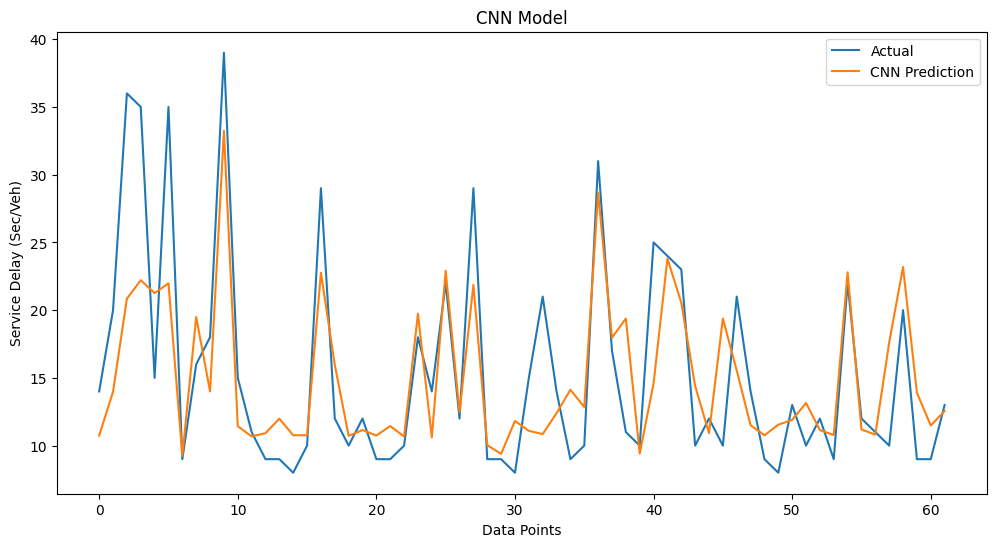

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [17]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
16/16 [==============================] - 1s 13ms/step - loss: 271.0056 - val_loss: 290.1066
Epoch 2/800
16/16 [==============================] - 0s 4ms/step - loss: 255.9223 - val_loss: 257.4510
Epoch 3/800
16/16 [==============================] - 0s 4ms/step - loss: 175.9265 - val_loss: 82.7895
Epoch 4/800
16/16 [==============================] - 0s 3ms/step - loss: 39.3831 - val_loss: 38.7725
Epoch 5/800
16/16 [==============================] - 0s 4ms/step - loss: 30.9593 - val_loss: 38.2113
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 29.1838 - val_loss: 36.0143
Epoch 7/800
16/16 [==============================] - 0s 4ms/step - loss: 28.7609 - val_loss: 35.7321
Epoch 8/800
16/16 [==============================] - 0s 3ms/step - loss: 28.3110 - val_loss: 36.0026
Epoch 9/800
16/16 [==============================] - 0s 3ms/step - loss: 28.0994 - val_loss: 33.9682
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 27.3429 - v

Visualize CNN_LSTM results

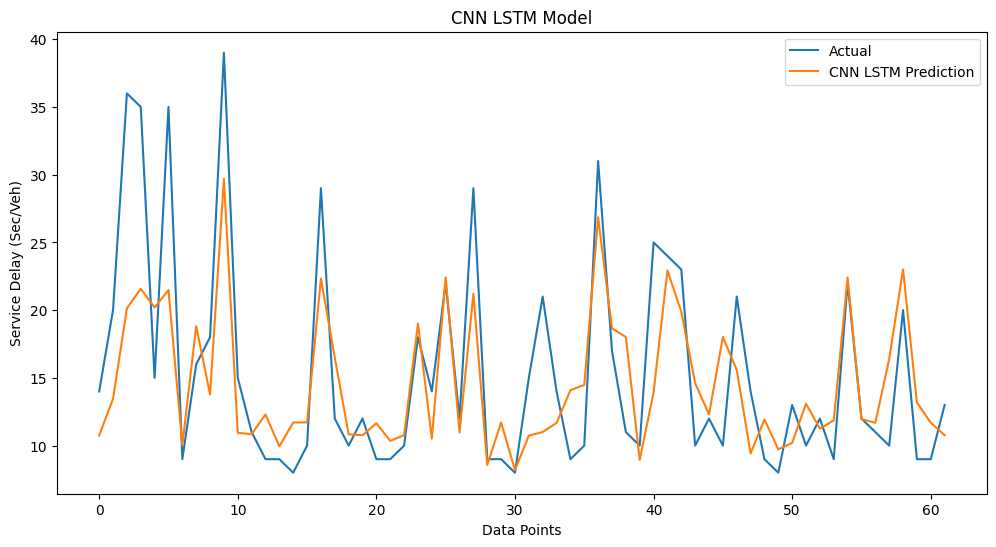

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [19]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/800
16/16 [==============================] - 2s 17ms/step - loss: 271.1977 - val_loss: 289.1343
Epoch 2/800
16/16 [==============================] - 0s 3ms/step - loss: 251.6601 - val_loss: 248.9865
Epoch 3/800
16/16 [==============================] - 0s 4ms/step - loss: 156.8867 - val_loss: 49.5183
Epoch 4/800
16/16 [==============================] - 0s 4ms/step - loss: 38.6327 - val_loss: 35.2639
Epoch 5/800
16/16 [==============================] - 0s 4ms/step - loss: 30.9657 - val_loss: 29.0143
Epoch 6/800
16/16 [==============================] - 0s 3ms/step - loss: 27.0641 - val_loss: 29.3520
Epoch 7/800
16/16 [==============================] - 0s 4ms/step - loss: 26.6820 - val_loss: 29.8429
Epoch 8/800
16/16 [==============================] - 0s 5ms/step - loss: 26.4836 - val_loss: 28.4662
Epoch 9/800
16/16 [==============================] - 0s 4ms/step - loss: 27.3178 - val_loss: 29.1360
Epoch 10/800
16/16 [==============================] - 0s 3ms/step - loss: 27.1479 - v

Visualize CNN_BiLSTM results

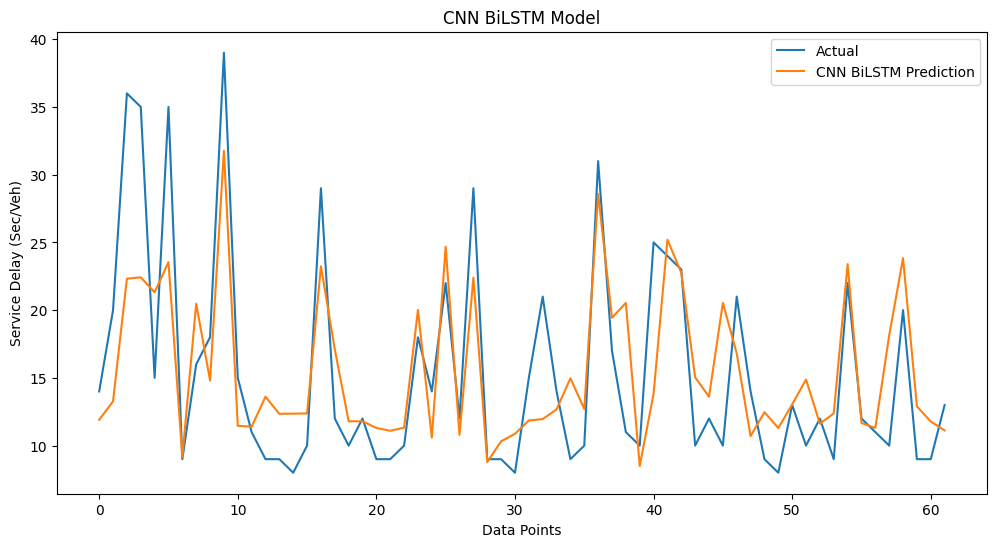

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [21]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

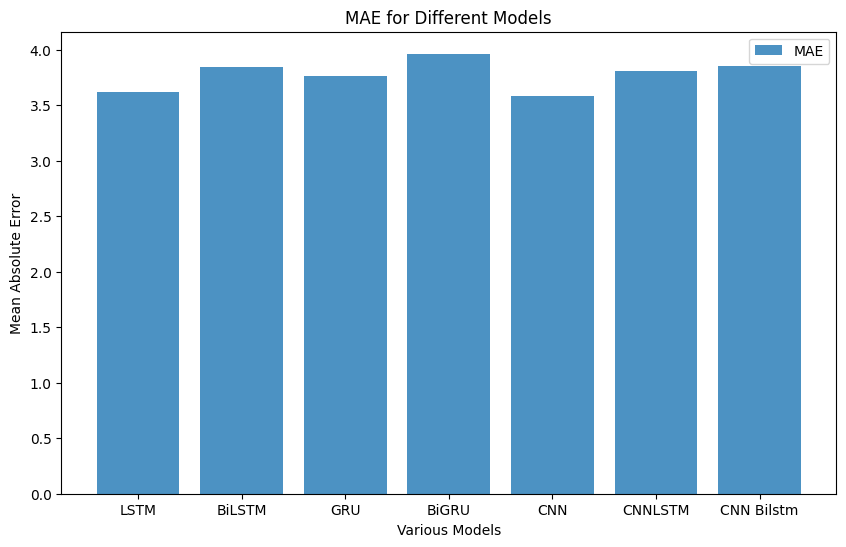

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

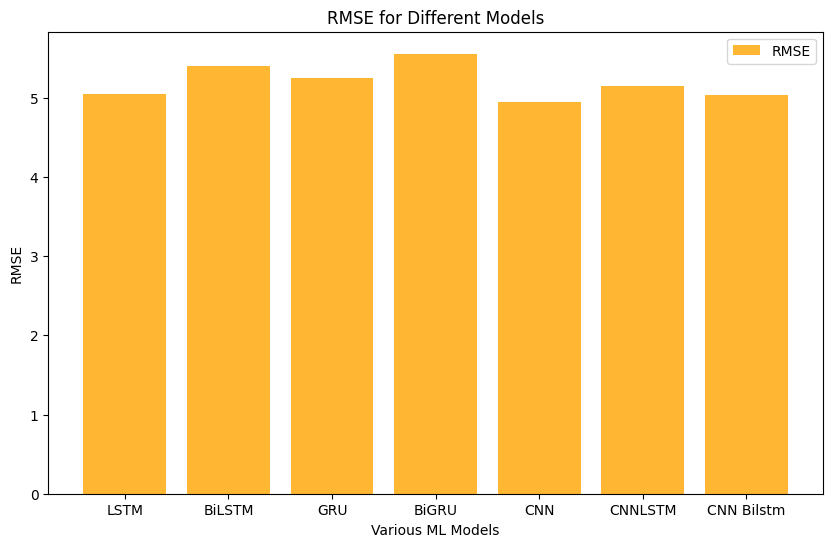

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

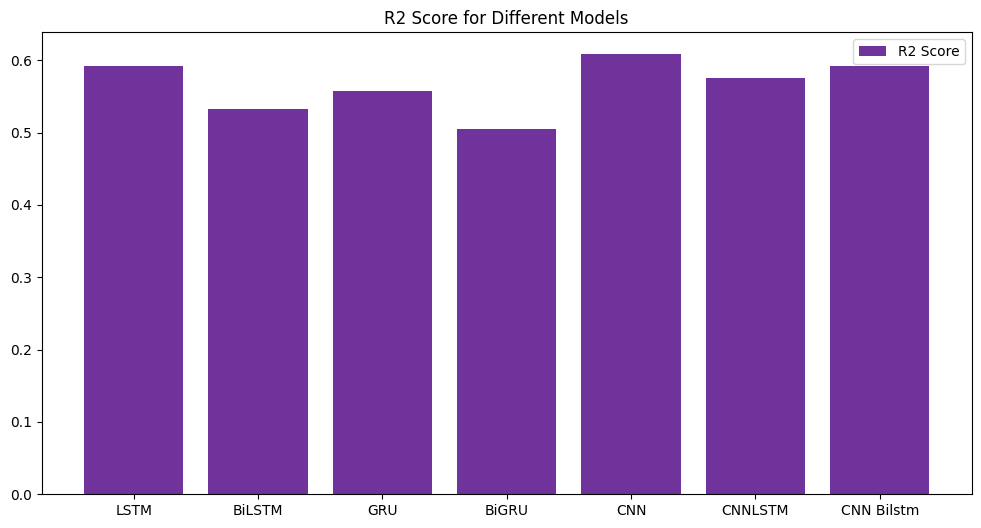

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [25]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 3.6165434621995494
LSTM MSE: 5.042364293330299
LSTM R2 Score: 0.5917093856527083

BiLSTM MAE: 3.845094680786133
BiLSTM MSE: 5.399077469560193
BiLSTM R2 Score: 0.5318984520828265

GRU MAE: 3.765605911131828
GRU MSE: 5.25287074731462
GRU R2 Score: 0.5569075108208075

BiGRU MAE: 3.9624183562494095
BiGRU MSE: 5.554622890814828
BiGRU R2 Score: 0.5045382659778227

CNN MAE: 3.5840494863448606
CNN MSE: 4.939874003782974
CNN R2 Score: 0.6081384039152626

CNN LSTM MAE: 3.8077163542470625
CNN LSTM MSE: 5.141486877857444
CNN LSTM R2 Score: 0.5754992884046795

CNN BiLSTM MAE: 3.8527162305770384
CNN BiLSTM MSE: 5.038754968869007
CNN BiLSTM R2 Score: 0.5922936853166958


Plot predictions for each model

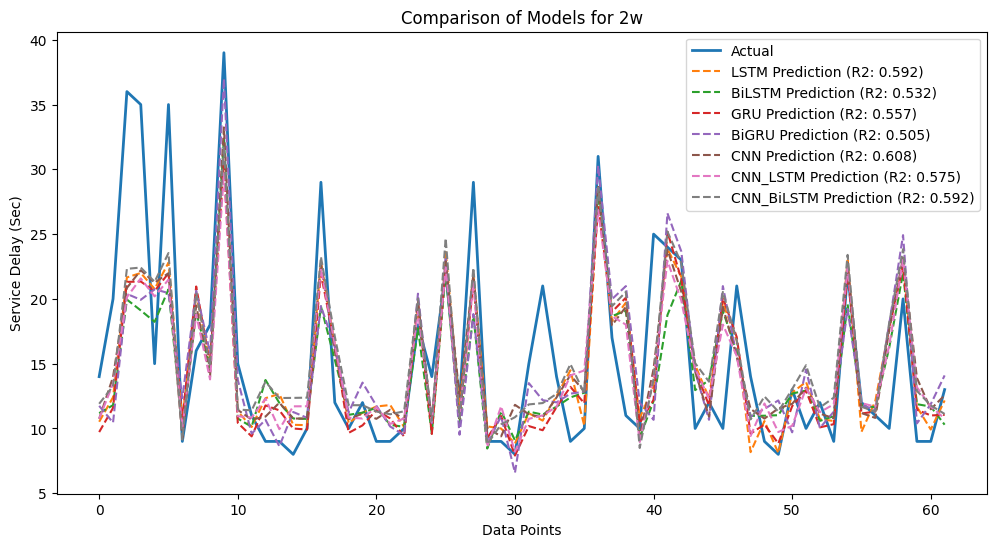

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for 2w')
plt.show()

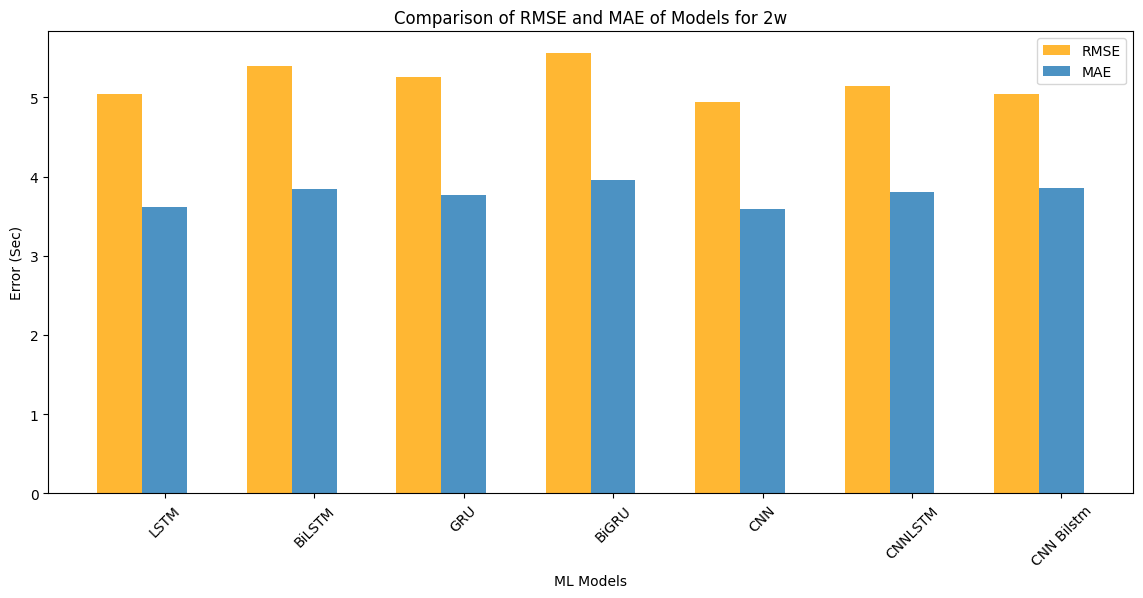

In [27]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for 2w')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()